In [1]:
import matplotlib.pyplot as plt
import time
from IPython.display import display
from xml.dom import minidom
import math
import folium
import pandas as pd
from pandas.io.json import json_normalize
import tqdm 
import numpy as np
import geopandas as gpd
import contextily as cx
from random import randint
import json

import warnings
warnings.filterwarnings("ignore")

# Routes

In [2]:
routes= gpd.read_file('Data/GIS/bus_routes/end_of_validation.json')

In [3]:
routes.crs

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
routes

,OBJECTID,Name,Station_ID,Bus_type,Fees,Trip_Type,SHAPE_Length,validated,need_to_check,geometry
0,1,الخرطوم - السوق المحلي,None,None,None,1,9462.706579,YES,None,"LINESTRING (451066.154 1715990.325, 451058.689..."
1,2,الخرطوم - السوق المركزي,None,None,None,1,9123.981371,YES,None,"LINESTRING (451705.725 1717152.322, 451604.355..."
2,3,الخرطوم - اركويت,None,None,None,1,10560.812416,YES,None,"LINESTRING (453189.237 1717919.433, 453145.271..."
3,4,الخرطوم - السوق المحلي,None,None,None,0,8983.359243,YES,None,"LINESTRING (448710.075 1723992.469, 448714.676..."
4,5,الخرطوم - السوق المركزي,None,None,None,0,8950.474195,YES,None,"LINESTRING (448710.075 1723992.469, 448714.676..."
...,...,...,...,...,...,...,...,...,...,...
449,619,صابرين - ليبيا ابوزيد,None,None,None,0,14994.819478,YES,None,"LINESTRING (443688.725 1738629.556, 443507.002..."
450,620,صابرين - ليبيا ابوزيد,None,None,None,1,14994.819478,YES,None,"LINESTRING (443688.725 1738629.556, 443507.002..."
451,625,الخرطوم - امبدة العاشرة,None,None,None,0,17131.593509,YES,None,"LINESTRING (439727.028 1733499.374, 439669.105..."
452,626,الخرطوم - امبدة العاشرة,None,None,None,1,18476.139010,YES,None,"LINESTRING (448620.935 1724032.574, 448631.520..."


<AxesSubplot:>

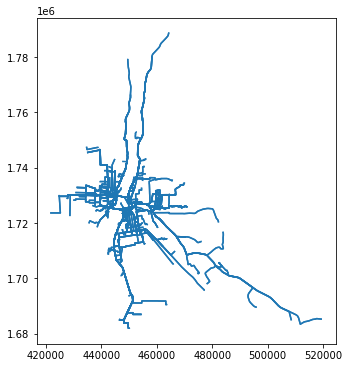

In [5]:
routes.plot(figsize=(6, 6))

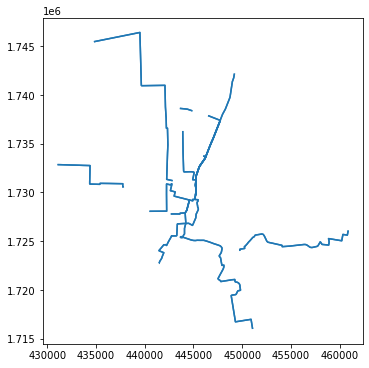

26                            الشهدا - الاهلية
27                            الشهدا - الاهلية
72                    الشهدا - الثورة الحارة 6
73                    الشهدا - الثورة الحارة 6
74                 الشهدا - الثورة الحارة21/30
75                 الشهدا - الثورة الحارة21/30
94              السوق الشعبي امدرمان - الفتح 2
95              السوق الشعبي امدرمان - الفتح 2
96                           الشهدا - الجرافة 
97                            الشهدا - الحتانة
98                            الشهدا - الحتانة
103                          الشهدا - الجرافة 
114            الميناء البري - الثورة الشنقيطي
115            الميناء البري - الثورة الشنقيطي
129                 صابرين - الثورة الحارة 17 
130                 صابرين - الثورة الحارة 17 
147           السوق الشعبي امدرمان - الراشدين 
148           السوق الشعبي امدرمان - الراشدين 
328               الخرطوم - الحاج يوسف الفيحاء
351               الخرطوم - الحاج يوسف الفيحاء
371    السوق الشعبي امدرمان - حمد النيل مربعات
376          

In [6]:
routes[routes.need_to_check== 'YES'].plot(figsize=(6, 6))
plt.show()
print(routes[routes.need_to_check== 'YES'].Name)

In [7]:
color = []
n = len(routes)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

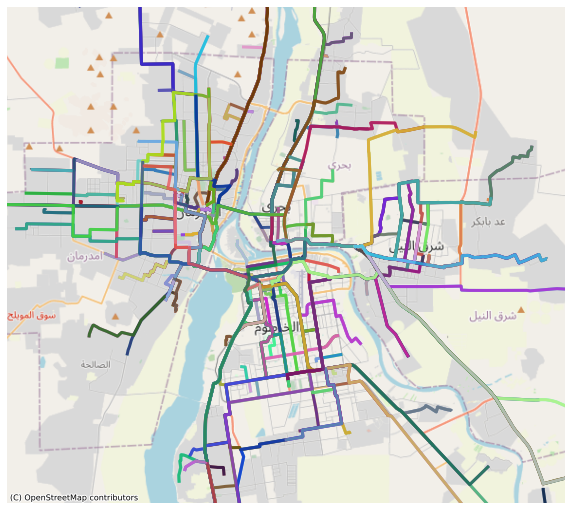

In [8]:
ax = routes.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.75, linewidth= 3, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3600000, 3645000])
plt.ylim([1740000, 1780000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

In [ ]:
### TO DO ###

f = folium.Figure(width=800, height=800)

the_map= folium.Map(location=[15.5007, 32.5599],
                    zoom_start = 17, tiles='openstreetmap').add_to(f)
add_all_tiles(the_map)

folium.PolyLine(routes.geometry[0]).add_to(the_map_map)

# Add layer control to change tiles:
folium.LayerControl(sortLayers=True).add_to(the_map)

# To store the map as a HTML page:
# the_map.save('map_001.html')

# To display the map in a Jupyter notebook:
the_map

# Neighborhoods

In [9]:
#for neighborhoods geojson
from shapely import wkt

neighborhoods= gpd.read_file('Data/GIS/other_layers/krt_neighborhoods.json')

neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.encode('cp1252')
neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.decode('cp1256')

neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.encode('cp1252')
neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.decode('cp1256')

neighborhoods['AU_Name']= neighborhoods.AU_Name.str.encode('cp1252')
neighborhoods['AU_Name']= neighborhoods.AU_Name.str.decode('cp1256')

neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.encode('cp1252')
neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.decode('cp1256')

neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.encode('cp1252')
neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.decode('cp1256')

neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.encode('cp1252')
neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.decode('cp1256')

In [10]:
neighborhoods.columns = [x.lower() for x in neighborhoods.columns]
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

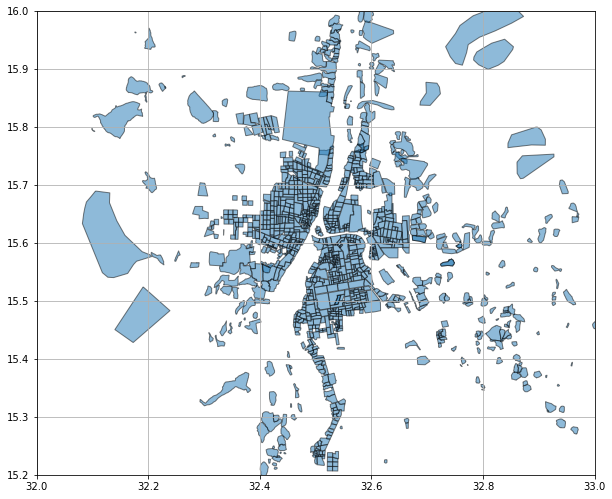

In [11]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [12]:
color = []
n = len(neighborhoods)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [13]:
#neighborhoods['House_Hold']= neighborhoods.House_Hold.replace(' ', 0).astype('int')
neighborhoods= neighborhoods.drop(neighborhoods[neighborhoods.house_hold == ' '].index.values)
neighborhoods['house_hold']= neighborhoods.house_hold.astype('int')
neighborhoods= neighborhoods[neighborhoods.house_hold <= 3000] #filtering out one extreme neigborhood

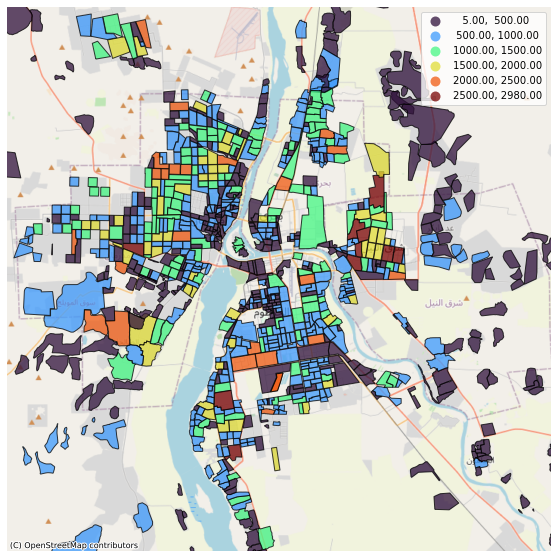

In [14]:
#ax = neighborhoods.to_crs(epsg=3857).plot(figsize=(20, 20), alpha=0.75, linewidth= 1, edgecolor='k', legend= True)
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'house_hold', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[500, 1000, 1500, 2000, 2500]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('neighborhood_map.jpg')

## Survey Responses

In [15]:
data= pd.read_excel('Data/Mobility_Survey/khartoum_mobility_survey.xlsx')
#data= pd.read_csv('matched_responces.csv') #for reading processed data

print(data.shape)
data.head()

(6897, 26)


,Timestamp,per_day,per_week,purpose,route,cost,access,access_time,safety,origin_locality,...,concerns,age,sex,employment,income,income_source,household_size,household_youth,household_cars,og_team_member_id
0,2023-03-06 10:55:22.508,2 times/day - مرتين في اليوم,1 to 2 days per week - يوم إلى يومين في الاسبوع,"Work - للوصول لمكان العمل, School/University ...",عربي- بري,30000.0,Ride with friend - بوصلك صاحبك/ملحة/سيفتي؟,NaN,I only feel safe during daytime - أشعر بالأمان...,Omdurman - أمدرمان,...,"Cost - السعر, Driver Behavior - سلوك السائقي...",25-34,Female - أنثى,Freelancer - مستقل\أعمال حرة,"150,000-300,000 pounds - بين 150-300 ألف جنيه",Private Business - عمل خاص,4,0,1,NaN
1,2023-03-06 10:56:20.084,Occasionally - أحياناً,1 to 2 days per week - يوم إلى يومين في الاسبوع,"Work - للوصول لمكان العمل, School/University ...",المركز الإسلامي - جامعة السودان العالمية الازهري,4000.0,Walk - عن طريق المشي (كداري),Less than 5 mins - أقل من 5 دقايق,I only feel safe during daytime - أشعر بالأمان...,Khartoum - الخرطوم,...,Personal Safety - السلامة الشخصية,25-34,Male - ذكر,Full-Time Employee - موظف بدوام كامل,"100,000-150,000 pounds - بين 100-150 ألف جنيه",Employment - الوظيفة,5,5,2,NaN
2,2023-03-06 11:33:32.494,More than 2 times/day - أكثر من مرتين في اليوم,Everyday - كل أيام الاسبوع,"Work - للوصول لمكان العمل, School/University ...",السوق المركزي - الكدرو,17000.0,Ride with friend - بوصلك صاحبك/ملحة/سيفتي؟,10-20 mins - من 10-20 دقيقة,I only feel safe during daytime - أشعر بالأمان...,Khartoum - الخرطوم,...,"Cost - السعر, Availability - توفر المواصلات,...",25-34,Male - ذكر,University Student - طالب جامعي,"100,000-150,000 pounds - بين 100-150 ألف جنيه",Employment - الوظيفة,3,0,1,NaN
3,2023-03-06 12:15:43.167,More than 2 times/day - أكثر من مرتين في اليوم,3 to 5 days per week - ثلاثه الى خمسه أيام في ...,"Work - للوصول لمكان العمل, School/University ...",صالحة-عربي,30000.0,Walk - عن طريق المشي (كداري),Less than 5 mins - أقل من 5 دقايق,"Yes, I feel safe. - نعم أشعر بالأمان",Omdurman - أمدرمان,...,Overcrowding - زحمة المواصلات,18-24,Male - ذكر,Full-Time Employee - موظف بدوام كامل,"300,000-750,000 pounds - بين 300-750 ألف جنيه",Employment - الوظيفة,6,1,1,NaN
4,2023-03-06 13:31:31.832,Never - لا استخدم المواصلات,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bahri - بحري,...,Nothing,55 and over - أ55 أو أكبر,Female - أنثى,Full-Time Employee - موظف بدوام كامل,"Less than 50,000 pounds - أقل من 50 ألف جنيه",Employment - الوظيفة,69,420,More than 2 - أكثر من 2,NaN


count      5676.000000
mean      22211.800352
std       17973.273599
min           0.000000
25%       10000.000000
50%       20000.000000
75%       30000.000000
max      100000.000000
Name: cost, dtype: float64


<AxesSubplot:>

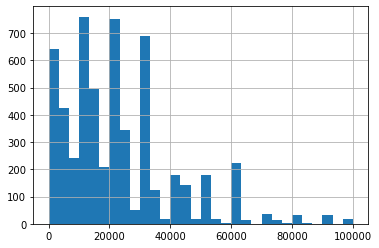

In [16]:
print(data.cost.describe())
data.cost.hist(bins=30)

count    6897.000000
mean        6.125127
std         9.931574
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max       600.000000
Name: household_size, dtype: float64


<AxesSubplot:>

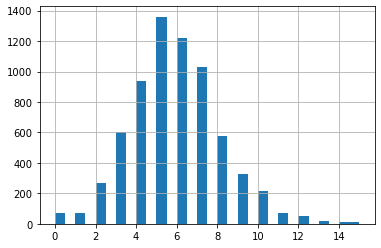

In [19]:
print(data.household_size.describe())
data[data.household_size <= 15].household_size.hist(bins=30)

count    6897.000000
mean        1.964332
std         5.546827
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       420.000000
Name: household_youth, dtype: float64


<AxesSubplot:>

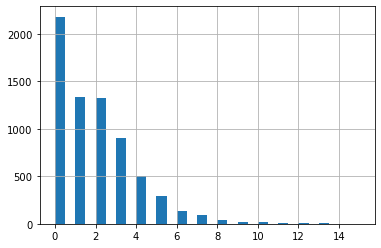

In [20]:
print(data.household_youth.describe())
data[data.household_youth <= 15].household_youth.hist(bins=30)

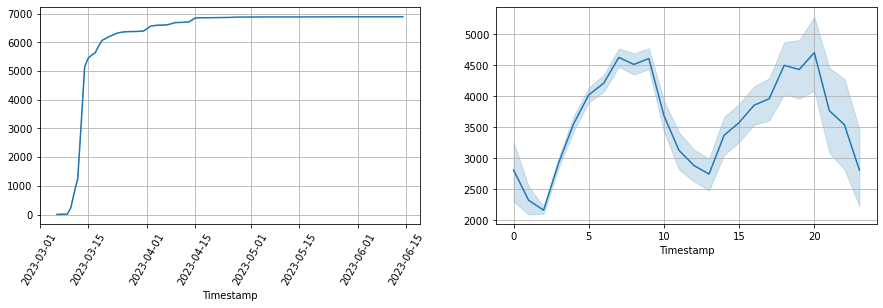

In [22]:
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x= data.Timestamp.dt.date, y= data.index.values)
plt.xticks(rotation=60)
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= data.Timestamp.dt.hour, y= data.index.values) #Hour is in US EST (KRT - 6)
plt.grid()

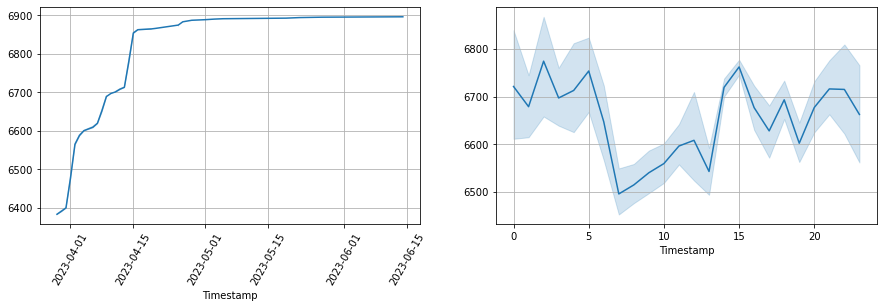

In [23]:
#for new social media data
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

subset= data[data.Timestamp >= '2023-03-29 00:00:00']
sns.lineplot(x= subset.Timestamp.dt.date, y= subset.index.values)
plt.xticks(rotation=60)
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= subset.Timestamp.dt.hour, y= subset.index.values) #Hour is in US EST (KRT - 6)
plt.grid()

In [24]:
#comparing age groups
print('For all data:')
display(pd.DataFrame(data.age.value_counts(normalize= True)).round(3)*100)
print('For sponsored social media:')
display(pd.DataFrame(subset.age.value_counts(normalize= True)).round(3)*100)

For all data:


,age
25-34,45.2
18-24,24.5
35-44,20.6
45-54,5.7
55 and over - أ55 أو أكبر,1.6
Prefer not to answer - افضل عدم الاجابة على هذا السؤال,1.4
Under 18 - أقل من 18 سنة,1.0


For sponsored social media:


,age
18-24,41.6
25-34,37.4
35-44,10.9
45-54,4.7
Under 18 - أقل من 18 سنة,3.1
55 and over - أ55 أو أكبر,1.6
Prefer not to answer - افضل عدم الاجابة على هذا السؤال,0.8


In [25]:
print(data.origin.value_counts())
print(data.destination.value_counts())

جبرة                150
كافوري              100
اركويت               97
شمبات                93
الازهري              93
                   ... 
الحارة ١٢             1
يثرب الشجرة           1
الثورة الحارة 62      1
حي الواحه             1
دار المصطفى           1
Name: origin, Length: 2368, dtype: int64
السوق العربي      484
العربي            342
السوق العربي      195
الخرطوم           146
الرياض            139
                 ... 
بحري كوبر           1
السلمه              1
الخرطوم العمل       1
جعفر بن عوف         1
العمارات ، ش25      1
Name: destination, Length: 2076, dtype: int64


In [26]:
data['origin']= data.origin.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
data['destination']= data.destination.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
print(data.origin.value_counts())
print(data.destination.value_counts())

جبره                 204
الثوره               116
اركويت               114
الازهري              111
كافوري               101
                    ... 
الشغله شرق مربع 2      1
جادين                  1
جبره 13                1
مربع ٣٦                1
دار المصطفي            1
Name: origin, Length: 2114, dtype: int64
السوق العربي           496
العربي                 348
السوق العربي           197
جامعه الخرطوم          157
الخرطوم                146
                      ... 
 السجانه                 1
الثوره ح 1               1
كليه المدائن             1
الخرطوم ... الرياض       1
العمارات ، ش25           1
Name: destination, Length: 1864, dtype: int64


In [27]:
#get counts
neighborhoods.loc_name.value_counts()

شرق النيل     244
امدرمان       181
جبل أولياء    167
الخرطوم       148
أم بده        145
كررى          132
بحري           88
بحرى شمال      86
كرري           37
ام بده          1
Name: loc_name, dtype: int64

In [28]:
#fix naming
neighborhoods.loc_name[neighborhoods.loc_name == 'بحرى شمال'] = 'بحري'
neighborhoods['loc_name']= neighborhoods.loc_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods['au_name']= neighborhoods.au_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods.loc_name.value_counts()

شرق النيل     244
امدرمان       181
بحري          174
كرري          169
جبل اولياء    167
الخرطوم       148
ام بده        146
Name: loc_name, dtype: int64

<AxesSubplot:>

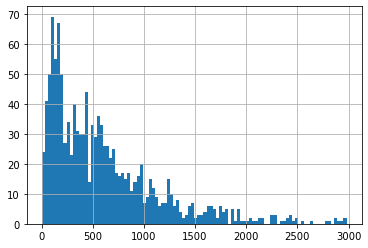

In [30]:
neighborhoods.dropna(subset=['fid'], inplace= True)
neighborhoods.reset_index(drop= True, inplace= True)
neighborhoods.house_hold.hist(bins= 100)

In [31]:
neighborhoods.groupby(['loc_name', 'au_name'])[['fid']].count()

fid
loc_name   au_name           
الخرطوم    الخرطوم شرق     32
           الخرطوم شمال    20
           الخرطوم غرب     15
           الخرطوم وسط     27
           الشجره          15
           الشهداء وسوبا   39
ام بده     الامير          30
           البقعه          38
           الريف الغربي    40
           السلام          38
امدرمان    ابو سعد         42
           ابو عنجه        13
           الريف الجنوبي   68
           الفتيحاب        10
           المورده         14
           حي العرب        17
           ود نوباوي       17
بحري       الجيلي          48
           السليت          38
           بحري شمال       54
           بلديه بحري      34
جبل اولياء الازهري         35
           الكلاكلات       43
           النصر           24
           جبل اولياء      65
شرق النيل  الحاج يوسف      14
           العسيلات        13
           العيلفون        38
           ام ضوابان       38
           شرق النيل       47
           وادي ابو صالح   39
           وادي سوبا       55
كرري       الثورات         37
           الريف الشمالي   68
           كرري            64

In [36]:
trial= ['الخرطوم شرق', 'اركويت جامعه', 'الكلاكلة', 'كافوري', 'صالحه', 'الأزهري', 'المهندسين', 'الدروشاب']

In [37]:
#using difflib
import difflib
def string_similarity(str1, str2):
    str1= ''.join([i for i in str1 if not i.isdigit()])
    str2= ''.join([i for i in str2 if not i.isdigit()])
    str2= str2.replace('أ','ا').replace('ة','ه').replace('ى','ي')
    #str2= str2[:len(str2.partition(' ')[0])+3]
    str1= str1.replace('أ','ا').replace('ة','ه').replace('ى','ي')[:len(str2)]
    result =  difflib.SequenceMatcher(a=str1, b=str2)
    return result.ratio()

In [38]:
#using bioalign
from Bio.Align import PairwiseAligner
def string_similarity_(str1, str2):
    aligner = PairwiseAligner()
    return aligner.score(str1, str2)/len(str2)

In [39]:
match= []

for t in range(len(trial)):
    max_score= 0
    max_index= 0
    for n in range(len(neighborhoods.pau_name)):
        score= string_similarity(neighborhoods.pau_name.iat[n], trial[t])
#         score_au= string_similarity(neighborhoods.au_name.iat[n], trial[t])
#         score = score_au if score_au > score else score
        #score= string_similarity(str(neighborhoods.pau_name[n].replace('أ','ا').replace('ة','ه')),
        #                         str(trial[t].replace('أ','ا').replace('ة','ه')))
        #score= string_similarity(str(neighborhoods.pau_name[n].encode), str(trial[t].encode))
        #max_score= score if score > max_score else score
        if score > max_score:
            max_score = score
            max_index = n
    if max_score <= 0.75:
        match.append([trial[t], 'No Match Found', round(max_score,3)])
    else:
        match.append([trial[t], neighborhoods.pau_name.iat[max_index], round(max_score,3)])

In [40]:
print(match)

[['الخرطوم شرق', 'الخرطوم 3 شرق', 0.909], ['اركويت جامعه', 'اركويت مربع61', 0.783], ['الكلاكلة', 'No Match Found', 0.75], ['كافوري', 'كافوري', 1.0], ['صالحه', 'صالحة شرق', 1.0], ['الأزهري', 'الازهري م2-6', 1.0], ['المهندسين', 'المهندسين م29', 1.0], ['الدروشاب', 'الدروشاب جنوب مربع1', 1.0]]


In [41]:
#for survey data
data['matched_origin'] = None
data['matching_score'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.origin[o])
#             score_au= string_similarity(neighborhoods.au_name.iat[n], data.origin[o])
#             score = score_au if score_au > score else score

            if score > max_score:
                max_score = score
                max_index = n
        if max_score <= 0.75:
            data.at[o, 'matched_origin'] = 'No Match Found'
        else:
            data.at[o, 'matched_origin'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score'] = round(max_score,3)

100%|███████████████████████████████████████| 6897/6897 [07:51<00:00, 14.63it/s]


In [42]:
#show matching diagnostics
print(f'Percent unmatched= {round(len(data[data.matched_origin == "No Match Found"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']]

Percent unmatched= 31.4


,origin,matched_origin,matching_score
0,المهندسين,المهندسين م29,1.000
1,الازهري,الازهري م2-6,1.000
2,جبره الاسكان,No Match Found,0.000
3,صالحه,صالحة شرق,1.000
4,الدروشاب,الدروشاب جنوب مربع1,1.000
...,...,...,...
6892,اركويت,اركويت مربع 59,1.000
6893,الكلاكله,No Match Found,0.000
6894,الكلاكله شرق,الاملاك شرق,0.783
6895,اركويت,اركويت مربع 59,1.000


In [44]:
#similarly for destinations
#for survey data
data['matched_destination'] = None
data['matching_score_d'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.destination[o])
            if score > max_score:
                max_score = score
                max_index = n
        if max_score <= 0.75:
            data.at[o, 'matched_destination'] = 'No Match Found'
        else:
            data.at[o, 'matched_destination'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score_d'] = round(max_score,3)
            
print(f'Percent unmatched= {round(len(data[data.matched_destination == "No Match Found"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score_d']]

100%|███████████████████████████████████████| 6897/6897 [08:10<00:00, 14.06it/s]

Percent unmatched= 55.400000000000006


,destination,matched_destination,matching_score_d
0,الخرطوم شرق,الخرطوم 3 شرق,0.909
1,اركويت,اركويت مربع 59,1.000
2,جامعه بحري,No Match Found,0.000
3,المنشيه,المنشية مربع 25,1.000
4,كافوري,كافوري,1.000
...,...,...,...
6892,سوق امدرمان,No Match Found,0.000
6893,وسط الخرطوم,"الخرطوم 1,2",0.762
6894,المنطقه الصناعيه,المنطقة الصناعية,0.970
6895,العربي,العريقيب,0.833


In [45]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

100%|█████████████████████████████████████| 1229/1229 [00:00<00:00, 1343.08it/s]


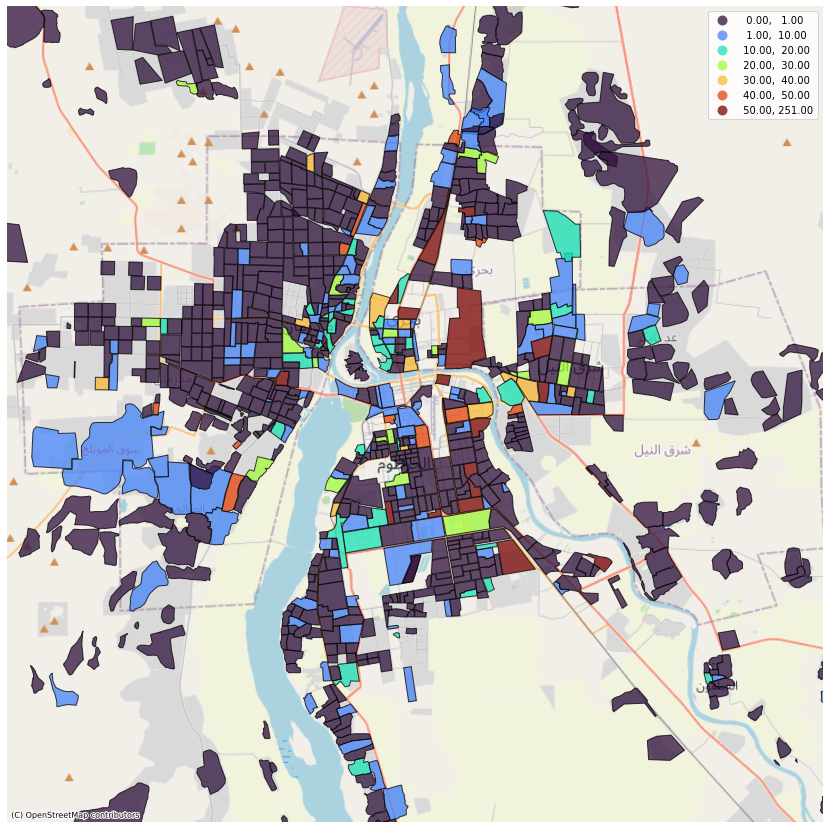

In [46]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(15, 15), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1, 10,20,30,40,50]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

# using GeoCode

In [47]:
#using geocoding to match unmatched origins and destinations
gcd_data= data[data.matched_origin == 'No Match Found']

In [48]:
gcd_data['location'] = gcd_data.origin+', الخرطوم, السودان'

In [52]:
test= gpd.tools.geocode(gcd_data.location.sample(10))
test= test.to_crs(epsg=4326)

In [53]:
test.address

3218    مسجد النور - الكلاكلة صنقعت, شارع الكلاكله شرق...
2336                  سوبا غرب, الخرطوم, الخرطوم, السودان
1419           ابوسعد مربع 13, أم درمان, الخرطوم, السودان
2594           الكلاكلة القلعة, الخرطوم, الخرطوم, السودان
4719    المسجد العتيق الثوره ح ١٧, شارع النص, شارع الن...
1311                          شرق النيل, الخرطوم, السودان
4286        شارع الستين, 00249, الخرطوم, الخرطوم, السودان
613            ابوسعد مربع 13, أم درمان, الخرطوم, السودان
416                             امدرمان, الخرطوم, السودان
6102                الثورة 51, أم درمان, الخرطوم, السودان
Name: address, dtype: object

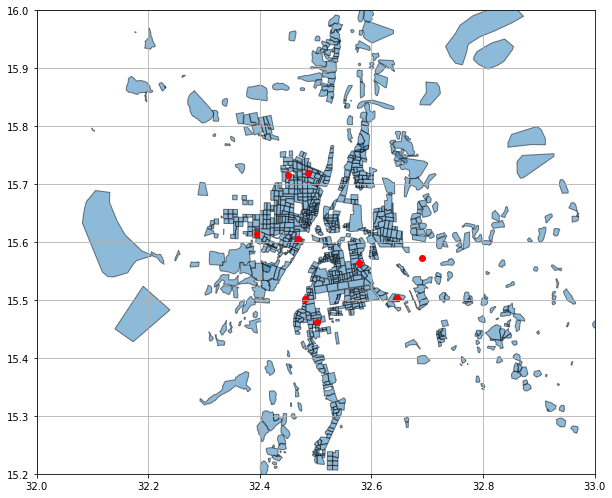

In [54]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
test.plot(ax=ax, c='r')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [55]:
from shapely.geometry import Point, Polygon

test['pau_name'] = 'Unknown'
with tqdm.tqdm(total= len(test), position=0, leave=True) as pbar:
    for i in range(len(test)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(test.geometry.iat[i])):
                    test.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

print('After matching:')
test

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 19.21it/s]

After matching:


,geometry,address,pau_name
3218,POINT (32.50294 15.46169),"مسجد النور - الكلاكلة صنقعت, شارع الكلاكله شرق...",صنقعت شرق
2336,POINT (32.64506 15.50267),"سوبا غرب, الخرطوم, الخرطوم, السودان",سوبا الحلة م5-6
1419,POINT (32.46839 15.60483),"ابوسعد مربع 13, أم درمان, الخرطوم, السودان",مربع3
2594,POINT (32.48056 15.50240),"الكلاكلة القلعة, الخرطوم, الخرطوم, السودان",القلعة وسط
4719,POINT (32.48706 15.71907),"المسجد العتيق الثوره ح ١٧, شارع النص, شارع الن...",الحارة 17
1311,POINT (32.69143 15.57225),"شرق النيل, الخرطوم, السودان",Unknown
4286,POINT (32.57864 15.56460),"شارع الستين, 00249, الخرطوم, الخرطوم, السودان",Unknown
613,POINT (32.46839 15.60483),"ابوسعد مربع 13, أم درمان, الخرطوم, السودان",مربع3
416,POINT (32.39585 15.61312),"امدرمان, الخرطوم, السودان",الحارة51ود البشير
6102,POINT (32.45006 15.71578),"الثورة 51, أم درمان, الخرطوم, السودان",Unknown


In [56]:
#geocode everything
#use batches and wait 10 sec between batches to avoid errors due to gcd server limits
counter = 0
batch = 20
gcd = pd.DataFrame()

with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        while True:
            try:
                test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
                gcd= pd.concat([gcd, test])
                counter += batch
            except:
                print(f'Connection Breakdown at Batch: {i+1} \n')
                print(f'Retrying...')
                continue
            break
        time.sleep(10) #break down requests
gcd= gcd.to_crs(epsg=4326)

  0%|                                                 | 0/109.0 [00:00<?, ?it/s]

Connection Breakdown at Batch: 1 

Retrying...
Connection Breakdown at Batch: 1 

Retrying...
Connection Breakdown at Batch: 1 

Retrying...


  2%|▊                                        | 2/109.0 [00:31<28:05, 15.75s/it]

Connection Breakdown at Batch: 2 

Retrying...


  6%|██▎                                      | 6/109.0 [02:13<40:08, 23.38s/it]

Connection Breakdown at Batch: 6 

Retrying...
Connection Breakdown at Batch: 6 

Retrying...


 18%|███████▎                                | 20/109.0 [07:05<28:42, 19.35s/it]

Connection Breakdown at Batch: 20 

Retrying...


 21%|████████▍                               | 23/109.0 [08:13<29:25, 20.53s/it]

Connection Breakdown at Batch: 23 

Retrying...
Connection Breakdown at Batch: 23 

Retrying...


 23%|█████████▏                              | 25/109.0 [09:04<31:26, 22.46s/it]

Connection Breakdown at Batch: 25 

Retrying...
Connection Breakdown at Batch: 25 

Retrying...


 24%|█████████▌                              | 26/109.0 [09:36<35:05, 25.37s/it]

Connection Breakdown at Batch: 26 

Retrying...


 27%|██████████▋                             | 29/109.0 [10:40<29:45, 22.32s/it]

Connection Breakdown at Batch: 29 

Retrying...


 28%|███████████                             | 30/109.0 [11:09<32:04, 24.36s/it]

Connection Breakdown at Batch: 30 

Retrying...


 29%|███████████▋                            | 32/109.0 [11:57<30:14, 23.56s/it]

Connection Breakdown at Batch: 32 

Retrying...


 31%|████████████▍                           | 34/109.0 [12:34<26:05, 20.88s/it]

Connection Breakdown at Batch: 34 

Retrying...


 35%|█████████████▉                          | 38/109.0 [13:54<22:56, 19.39s/it]

Connection Breakdown at Batch: 38 

Retrying...


 37%|██████████████▋                         | 40/109.0 [14:36<23:18, 20.27s/it]

Connection Breakdown at Batch: 40 

Retrying...


 38%|███████████████                         | 41/109.0 [15:12<28:19, 24.99s/it]

Connection Breakdown at Batch: 41 

Retrying...


 39%|███████████████▊                        | 43/109.0 [16:06<28:17, 25.72s/it]

Connection Breakdown at Batch: 43 

Retrying...


 42%|████████████████▉                       | 46/109.0 [17:10<23:19, 22.22s/it]

Connection Breakdown at Batch: 46 

Retrying...
Connection Breakdown at Batch: 46 

Retrying...


 44%|█████████████████▌                      | 48/109.0 [18:16<27:25, 26.98s/it]

Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...
Connection Breakdown at Batch: 48 

Retrying...


 45%|█████████████████▉                      | 49/109.0 [19:42<44:38, 44.64s/it]

Connection Breakdown at Batch: 49 

Retrying...
Connection Breakdown at Batch: 49 

Retrying...
Connection Breakdown at Batch: 49 

Retrying...
Connection Breakdown at Batch: 49 

Retrying...
Connection Breakdown at Batch: 49 

Retrying...
Connection Breakdown at Batch: 49 

Retrying...


 46%|██████████████████▎                     | 50/109.0 [21:01<53:49, 54.75s/it]

Connection Breakdown at Batch: 50 

Retrying...


 59%|███████████████████████▍                | 64/109.0 [26:02<15:57, 21.27s/it]

Connection Breakdown at Batch: 64 

Retrying...


 61%|████████████████████████▌               | 67/109.0 [27:10<15:17, 21.85s/it]

Connection Breakdown at Batch: 67 

Retrying...


 62%|████████████████████████▉               | 68/109.0 [27:37<16:00, 23.42s/it]

Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...
Connection Breakdown at Batch: 68 

Retrying...


 63%|█████████████████████████▎              | 69/109.0 [29:45<36:29, 54.73s/it]

Connection Breakdown at Batch: 69 

Retrying...
Connection Breakdown at Batch: 69 

Retrying...


 64%|█████████████████████████▋              | 70/109.0 [30:16<30:56, 47.60s/it]

Connection Breakdown at Batch: 70 

Retrying...
Connection Breakdown at Batch: 70 

Retrying...


 65%|██████████████████████████              | 71/109.0 [30:52<27:57, 44.14s/it]

Connection Breakdown at Batch: 71 

Retrying...
Connection Breakdown at Batch: 71 

Retrying...


 66%|██████████████████████████▍             | 72/109.0 [31:28<25:44, 41.76s/it]

Connection Breakdown at Batch: 72 

Retrying...
Connection Breakdown at Batch: 72 

Retrying...
Connection Breakdown at Batch: 72 

Retrying...


 67%|██████████████████████████▊             | 73/109.0 [32:32<28:56, 48.24s/it]

Connection Breakdown at Batch: 73 

Retrying...


 69%|███████████████████████████▌            | 75/109.0 [33:24<20:48, 36.72s/it]

Connection Breakdown at Batch: 75 

Retrying...


 71%|████████████████████████████▎           | 77/109.0 [34:26<17:30, 32.82s/it]

Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...
Connection Breakdown at Batch: 77 

Retrying...


 85%|██████████████████████████████████▏     | 93/109.0 [40:41<04:58, 18.65s/it]

Connection Breakdown at Batch: 93 

Retrying...
Connection Breakdown at Batch: 93 

Retrying...


 92%|███████████████████████████████████▊   | 100/109.0 [43:05<03:02, 20.28s/it]

Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown at Batch: 100 

Retrying...
Connection Breakdown

 94%|████████████████████████████████████▍  | 102/109.0 [45:34<05:02, 43.27s/it]

Connection Breakdown at Batch: 102 

Retrying...
Connection Breakdown at Batch: 102 

Retrying...
Connection Breakdown at Batch: 102 

Retrying...
Connection Breakdown at Batch: 102 

Retrying...


 96%|█████████████████████████████████████▌ | 105/109.0 [47:05<02:12, 33.07s/it]

Connection Breakdown at Batch: 105 

Retrying...


 97%|█████████████████████████████████████▉ | 106/109.0 [47:36<01:37, 32.42s/it]

Connection Breakdown at Batch: 106 

Retrying...


 99%|██████████████████████████████████████▋| 108/109.0 [48:27<00:28, 28.51s/it]

Connection Breakdown at Batch: 108 

Retrying...


100%|███████████████████████████████████████| 109/109.0 [49:15<00:00, 27.11s/it]


In [57]:
gcd['pau_name'] = 'Unknown'

with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

100%|███████████████████████████████████████| 2163/2163 [01:54<00:00, 18.92it/s]


In [58]:
for response in gcd.index.values:
    data.matched_origin.at[response] = gcd.pau_name.at[response]
    
print(f'Percent unmatched= {round(len(data[data.matched_origin == "Unknown"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']].sample(10)

Percent unmatched= 11.700000000000001


,origin,matched_origin,matching_score
3851,الصافيه,الصافية جنوب,1.0
3546,الطائف,الطائف جنوب,1.0
1716,الحاج يوسف,الحاج يوسف شرق,1.0
4536,جبره,جبرة شمال م1-2-3,1.0
6474,الحلفايا,الحلفايا الحي6,1.0
6134,شمبات,شمبات غرب,1.0
4521,شمبات,شمبات غرب,1.0
2970,الفيحاء,الفيحاء,1.0
6855,نبته,الجريف غرب الحارة4,0.0
1585,جبره,جبرة شمال م1-2-3,1.0


In [59]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

100%|█████████████████████████████████████| 1229/1229 [00:00<00:00, 1297.65it/s]


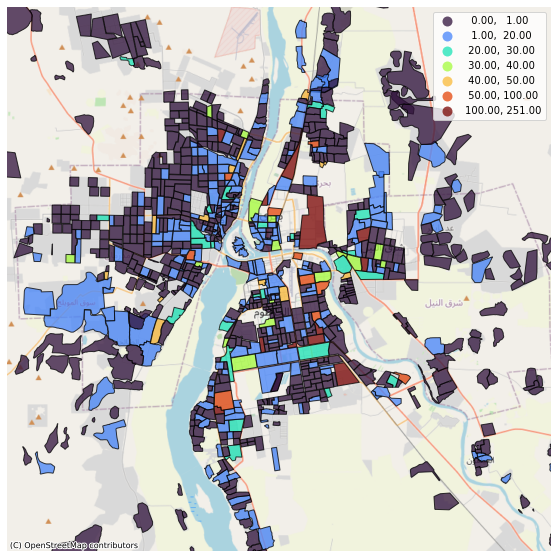

In [60]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth=1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('mobility_survey_origins.jpg') #print on 20x20

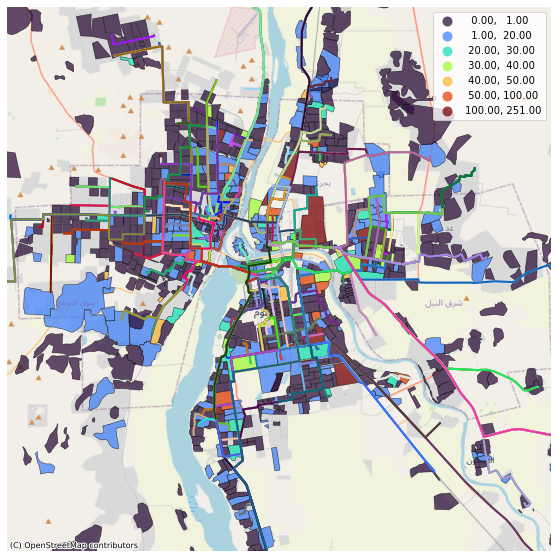

In [61]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth= 0.50, edgecolor='k', legend= True)
routes.to_crs(epsg=3857).plot(ax=ax, alpha=1.0, linewidth= 2, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('routes.jpg') #print on 20x20

Geocoding in Progress...


  1%|▍                                        | 2/192.0 [00:19<31:19,  9.89s/it]

Connection Breakdown at Batch: 2 

Retrying...
Connection Breakdown at Batch: 2 

Retrying...


 16%|██████▍                                 | 31/192.0 [08:31<44:14, 16.49s/it]

Connection Breakdown at Batch: 31 

Retrying...
Connection Breakdown at Batch: 31 

Retrying...


 43%|█████████████████▎                      | 83/192.0 [22:37<28:45, 15.83s/it]

Connection Breakdown at Batch: 83 

Retrying...
Connection Breakdown at Batch: 83 

Retrying...
Connection Breakdown at Batch: 83 

Retrying...


 47%|██████████████████▊                     | 90/192.0 [24:40<27:32, 16.20s/it]

Connection Breakdown at Batch: 90 

Retrying...


 55%|█████████████████████▎                 | 105/192.0 [28:42<22:52, 15.78s/it]

Connection Breakdown at Batch: 105 

Retrying...


 56%|█████████████████████▋                 | 107/192.0 [29:25<25:43, 18.16s/it]

Connection Breakdown at Batch: 107 

Retrying...


 73%|████████████████████████████▍          | 140/192.0 [38:39<13:57, 16.10s/it]

Connection Breakdown at Batch: 140 

Retrying...
Connection Breakdown at Batch: 140 

Retrying...
Connection Breakdown at Batch: 140 

Retrying...


 93%|████████████████████████████████████▏  | 178/192.0 [49:16<03:39, 15.68s/it]

Connection Breakdown at Batch: 178 

Retrying...
Connection Breakdown at Batch: 178 

Retrying...


 98%|██████████████████████████████████████▍| 189/192.0 [52:30<00:53, 17.92s/it]

Connection Breakdown at Batch: 189 

Retrying...
Connection Breakdown at Batch: 189 

Retrying...


100%|███████████████████████████████████████| 192/192.0 [53:49<00:00, 16.82s/it]


Geocoding Matching...


100%|███████████████████████████████████████| 3824/3824 [03:34<00:00, 17.87it/s]


Percent unmatched= 35.199999999999996
Counting...


100%|█████████████████████████████████████| 1229/1229 [00:00<00:00, 1415.11it/s]


Plotting...


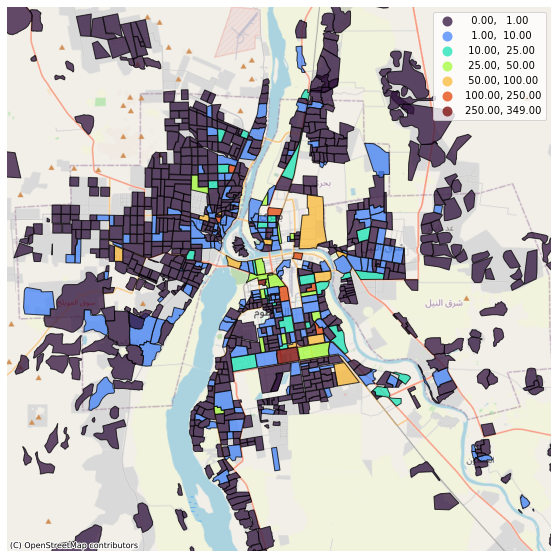

In [62]:
#same thing for destinations
#if it breaks, remove everything until creating gcd and replace tqdm total - i, i range(i,int(np.ceil...))

gcd_data= data[data.matched_destination == 'No Match Found']
gcd_data['location'] = gcd_data.destination+', الخرطوم, السودان'

counter = 0
batch = 20
gcd = pd.DataFrame()

print('Geocoding in Progress...')
with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        while True:  
            try:
                test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
                gcd= pd.concat([gcd, test])
                counter += batch
            except:
                print(f'Connection Breakdown at Batch: {i+1} \n')
                print(f'Retrying...')
                continue
            break
        time.sleep(10) #break down requests
gcd= gcd.to_crs(epsg=4326)
gcd['pau_name'] = 'Unknown'

print('Geocoding Matching...')
with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue
    
for response in gcd.index.values:
    data.matched_destination.at[response] = gcd.pau_name.at[response]
print(f'Percent unmatched= {round(len(data[data.matched_destination == "Unknown"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score']].sample(10)

print('Counting...')
neighborhoods['survey_count'] = 0
with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_destination.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

print('Plotting...')           
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,10,25,50,100,250]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('mobility_survey_destinations.jpg')

In [63]:
data.matched_destination

0          الخرطوم 3 شرق
1         اركويت مربع 59
2           الصافية جنوب
3        المنشية مربع 25
4                 كافوري
              ...       
6892          الاسبتالية
6893         الخرطوم 1,2
6894    المنطقة الصناعية
6895            العريقيب
6896       العمارات شمال
Name: matched_destination, Length: 6897, dtype: object

In [76]:
data.to_excel('Data/Mobility_Survey/kms_matched_responces.xlsx', index= False)

In [65]:
x= data.groupby(['matched_origin', 'matched_destination'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)

,matched_origin,matched_destination,per_day
11,Unknown,Unknown,323
2470,جبرة شمال م1-2-3,Unknown,79
263,الازهري م2-6,Unknown,60
601,الحارة 17,Unknown,60
2933,كافوري,Unknown,57
...,...,...,...
1564,العريقيب,الجريف غرب الحارة1ج والاصلاحية,1
1565,العريقيب,الشجرة جنوب,1
1,,الخرطوم 3 شمال,1
1567,العريقيب,النخيلة,1


In [66]:
x= data.groupby(['origin_locality', 'destination_locality'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)

,origin_locality,destination_locality,per_day
23,Khartoum - الخرطوم,Khartoum - الخرطوم,1935
30,Omdurman - أمدرمان,Khartoum - الخرطوم,774
3,Bahri - بحري,Khartoum - الخرطوم,693
37,Sharq Alnile - شرق النيل,Khartoum - الخرطوم,517
10,Jabal Awlia - جبل أولياء,Khartoum - الخرطوم,513
31,Omdurman - أمدرمان,Omdurman - أمدرمان,367
0,Bahri - بحري,Bahri - بحري,322
16,Karari - كرري,Khartoum - الخرطوم,268
39,Sharq Alnile - شرق النيل,Sharq Alnile - شرق النيل,150
24,Khartoum - الخرطوم,Omdurman - أمدرمان,142


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             6897 non-null   datetime64[ns]
 1   per_day               6897 non-null   object        
 2   per_week              5676 non-null   object        
 3   purpose               5676 non-null   object        
 4   route                 5676 non-null   object        
 5   cost                  5676 non-null   float64       
 6   access                5676 non-null   object        
 7   access_time           5483 non-null   object        
 8   safety                5484 non-null   object        
 9   origin_locality       6897 non-null   object        
 10  origin                6897 non-null   object        
 11  destination_locality  6897 non-null   object        
 12  destination           6897 non-null   object        
 13  start_time        

In [ ]:
cat_cols= ['purpose', 'access', 'concerns', 'age', 'sex', 'employment', 'income',
       'income_source', 'household_size', 'household_youth', 'household_cars',
       'og_team_member_id', 'matched_origin', 'matching_score',
       'matched_destination', 'matching_score_d']

= .astype('category')